https://towardsdatascience.com/plotting-with-python-c2561b8c0f1f

In [59]:
# Load the data
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/FBosler/AdvancedPlotting/master/combined_set.csv')
# this assigns labels per year
data['Mean Log GDP per capita']  = data.groupby('Year')['Log GDP per capita'].transform(
    pd.qcut,
    q=5,
    labels=(['Lowest','Low','Medium','High','Highest'])
)

In [60]:
import plotly
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
assert matplotlib.__version__ >= "3.1.0","""
Please install matplotlib version 3.1.0 by running:
1) !pip uninstall matplotlib 
2) !pip install matplotlib==3.1.0
"""

<AxesSubplot: ylabel='Frequency'>

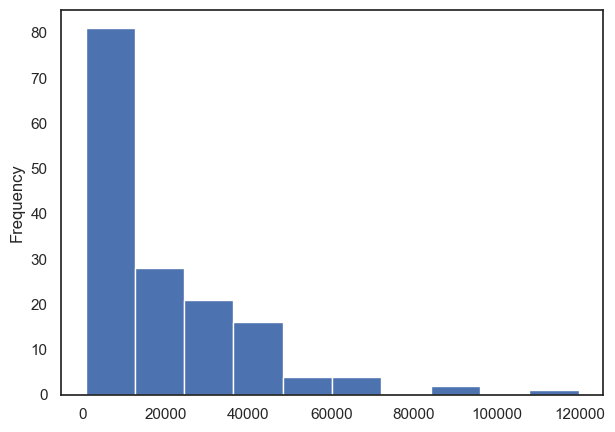

In [61]:
np.exp(data[data['Year']==2018]['Log GDP per capita']).plot(
    kind='hist'
)

<AxesSubplot: xlabel='Country name'>

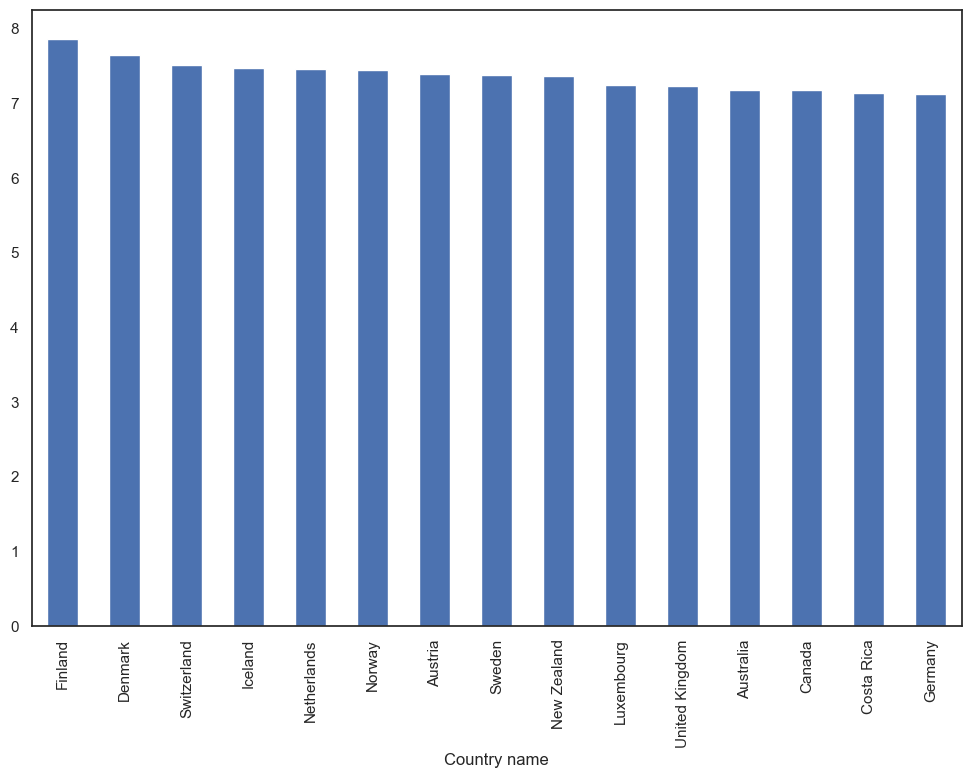

In [62]:
data[
    data['Year'] == 2018
].set_index('Country name')['Life Ladder'].nlargest(15).plot(
    kind='bar',
    figsize=(12,8)
)

<AxesSubplot: ylabel='Continent'>

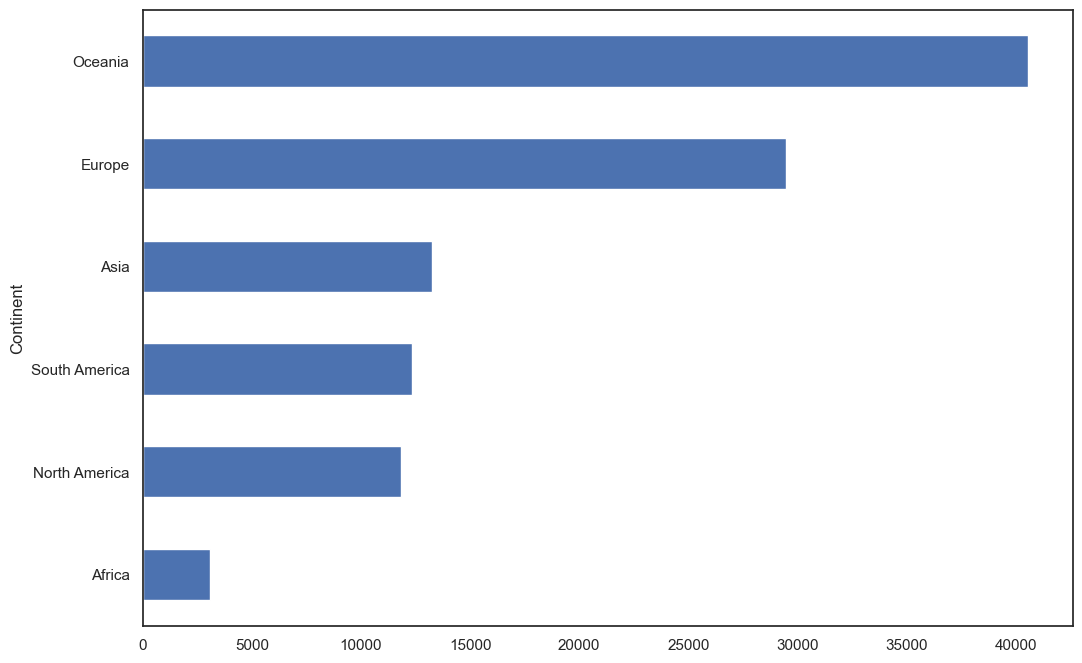

In [63]:
np.exp(data[
    data['Year'] == 2018
].groupby('Continent')['Log GDP per capita']\
       .mean()).sort_values().plot(
    kind='barh',
    figsize=(12,8)
)

<AxesSubplot: >

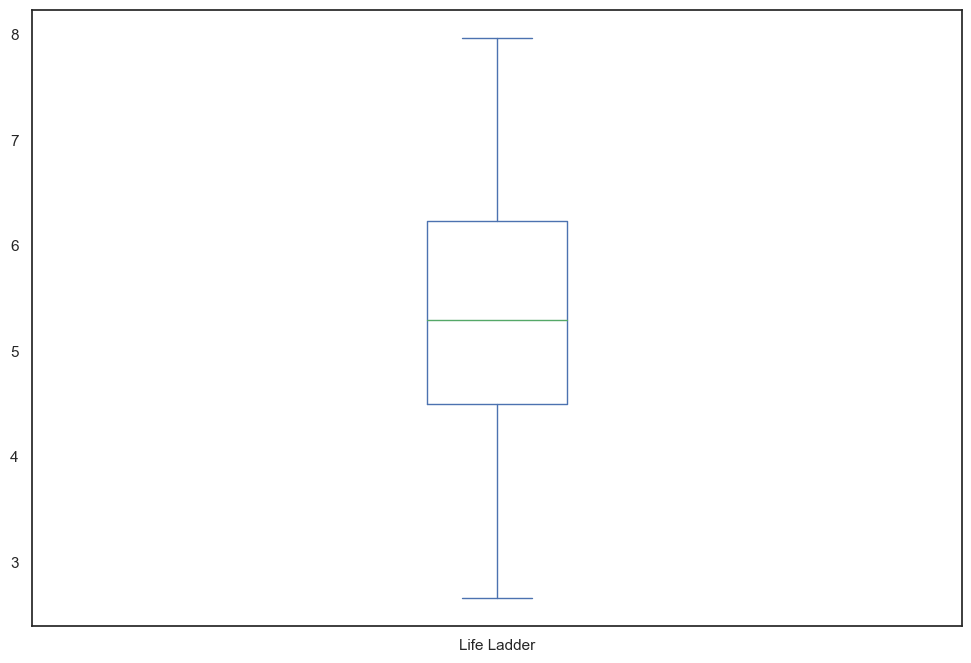

In [64]:
data['Life Ladder'].plot(
    kind='box',
    figsize=(12,8)
)

C:\Users\Mark\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Healthy life expectancy at birth', ylabel='Gapminder Life Expectancy'>

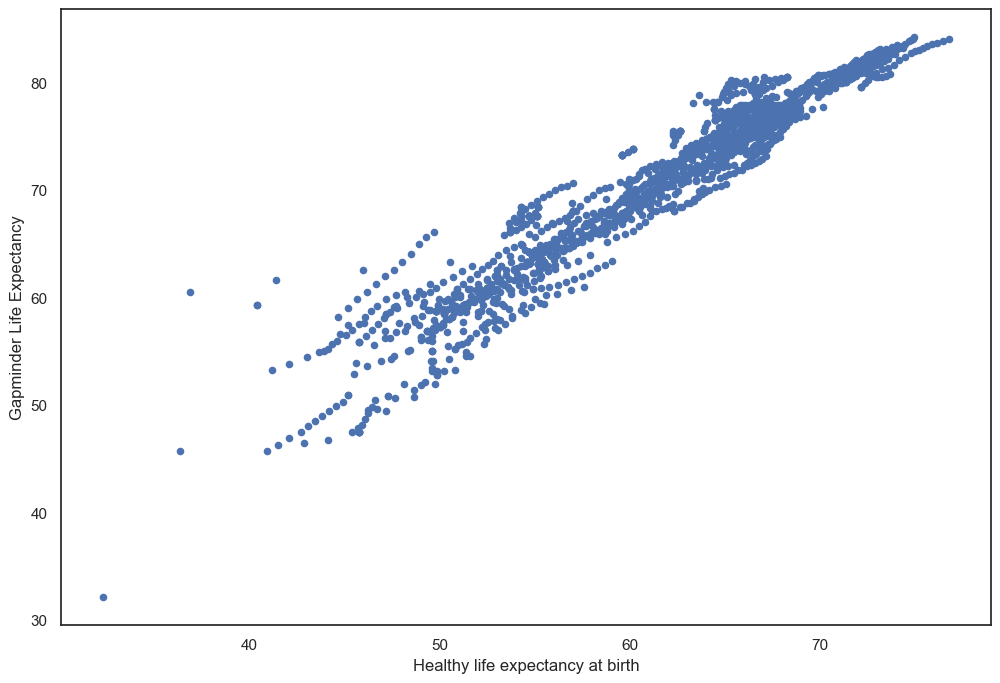

In [65]:
data[['Healthy life expectancy at birth','Gapminder Life Expectancy']].plot(
    kind='scatter',
    x='Healthy life expectancy at birth',
    y='Gapminder Life Expectancy',
    figsize=(12,8)
)

<AxesSubplot: xlabel='Healthy life expectancy at birth', ylabel='Generosity'>

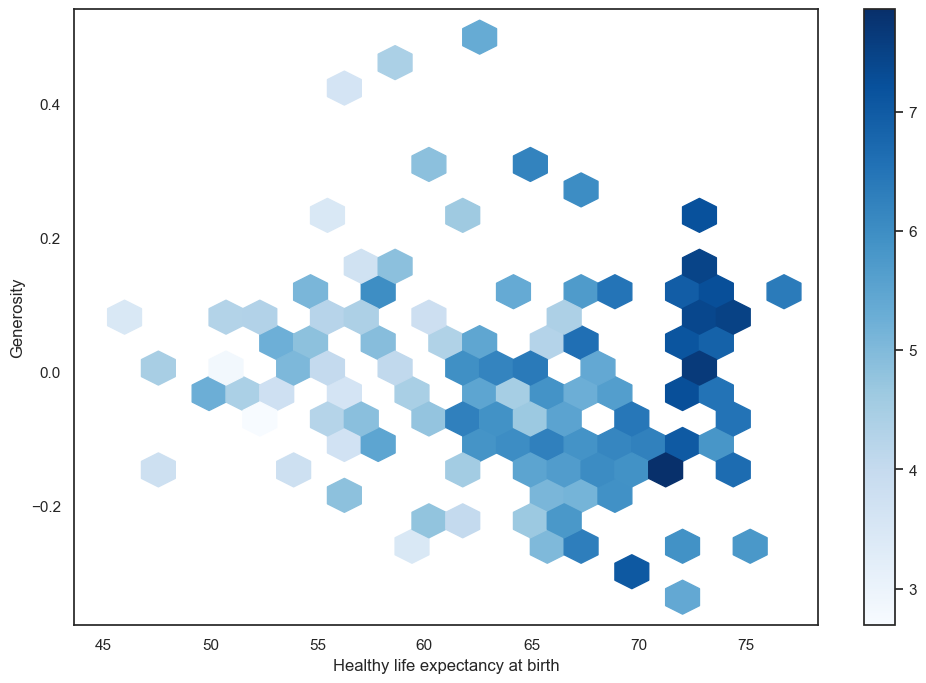

In [66]:
data[data['Year'] == 2018].plot(
    kind='hexbin',
    x='Healthy life expectancy at birth',
    y='Generosity',
    C='Life Ladder',
    gridsize=20,
    figsize=(12,8),
    cmap="Blues", # defaults to greenish
    sharex=False # required to get rid of a bug
)

<AxesSubplot: ylabel='Gapminder Population'>

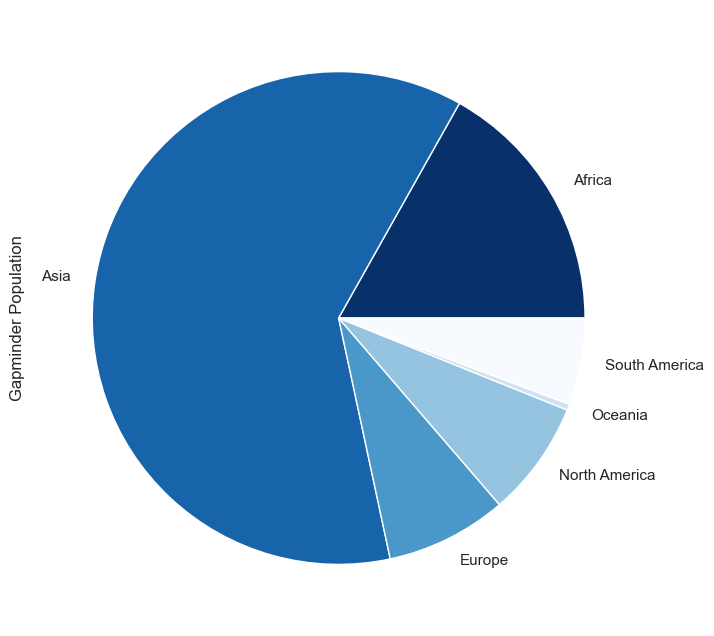

In [67]:
data[data['Year'] == 2018].groupby(
    ['Continent']
)['Gapminder Population'].sum().plot(
    kind='pie',
    figsize=(12,8),
    cmap="Blues_r", # defaults to orangish
)

<AxesSubplot: xlabel='Year'>

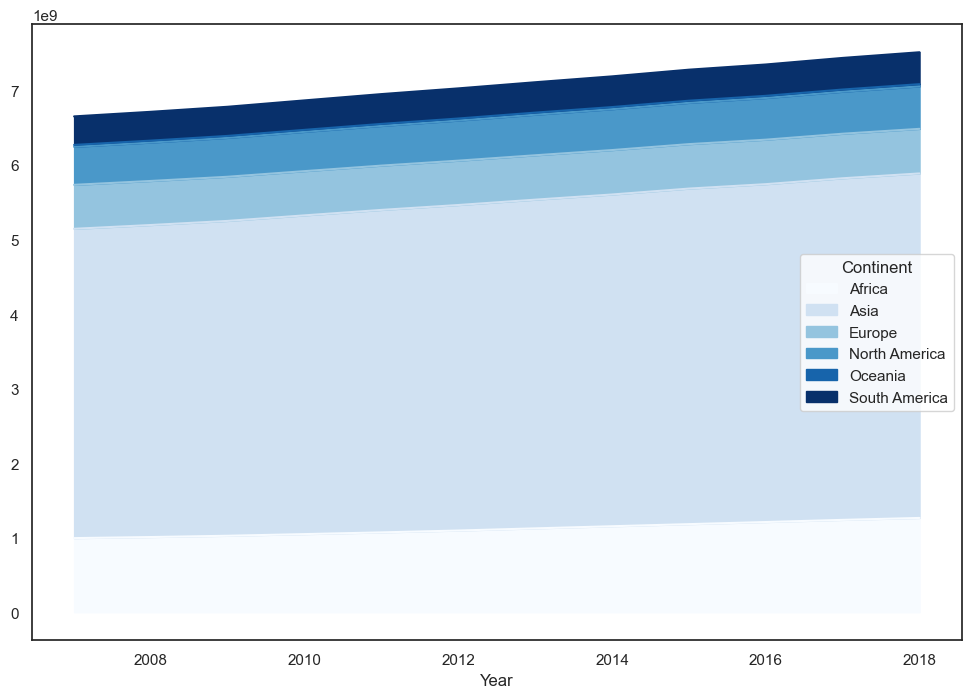

In [68]:
data.groupby(
    ['Year','Continent']
)['Gapminder Population'].sum().unstack().plot(
    kind='area',
    figsize=(12,8),
    cmap="Blues", # defaults to orangish
)

<AxesSubplot: xlabel='Year'>

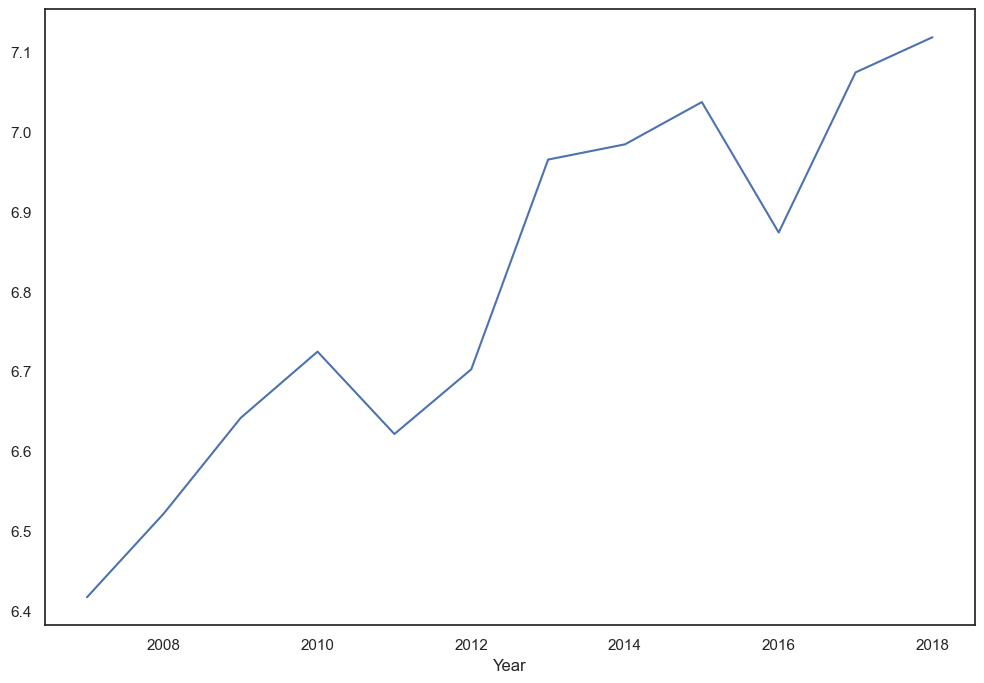

In [69]:
data[
    data['Country name'] == 'Germany'
].set_index('Year')['Life Ladder'].plot(
    kind='line',
    figsize=(12,8)
)

In [70]:
import seaborn as sns
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(7,5)}, 
    style="white" # nicer layout
)

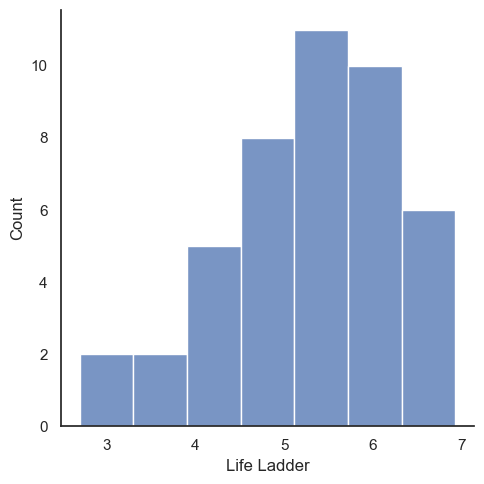

In [73]:
sns_data=data[
    (data['Year']==2018) &
    (data['Continent']=='Asia')
]

sns.displot(sns_data['Life Ladder'],label='Life Ladder')
sns.despine()
plt.show()


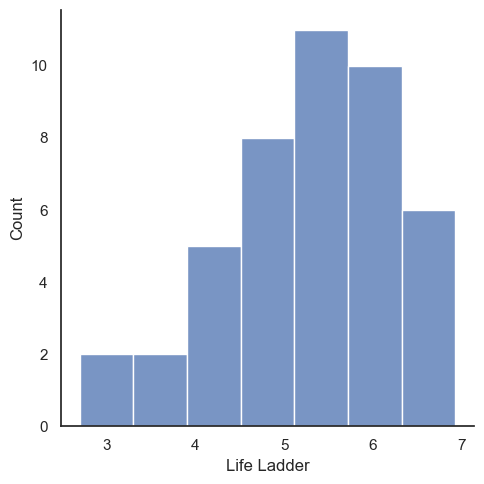

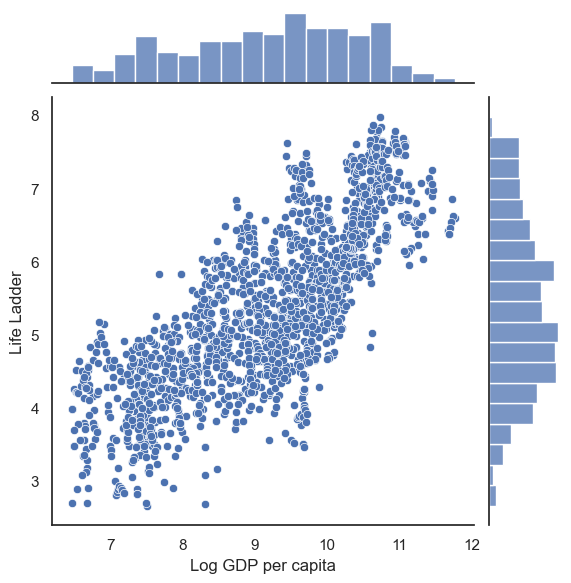

In [72]:
sns.jointplot(
    x='Log GDP per capita',
    y='Life Ladder',
    data=data,
    kind='scatter' # or 'kde' or 'hex'
)
plt.show()

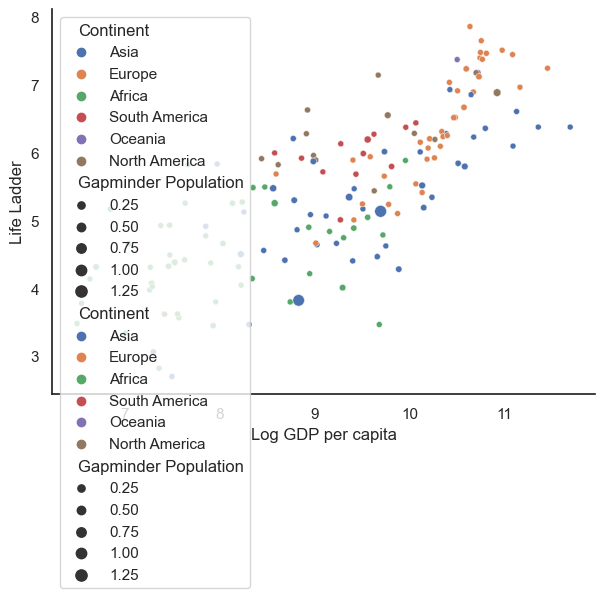

In [75]:
sns.scatterplot(
    x='Log GDP per capita',
    y='Life Ladder',
    data=data[data['Year'] == 2018],    
    hue='Continent',
    size='Gapminder Population'
)
# both, hue and size are optional
sns.despine() # prettier layout
plt.show()

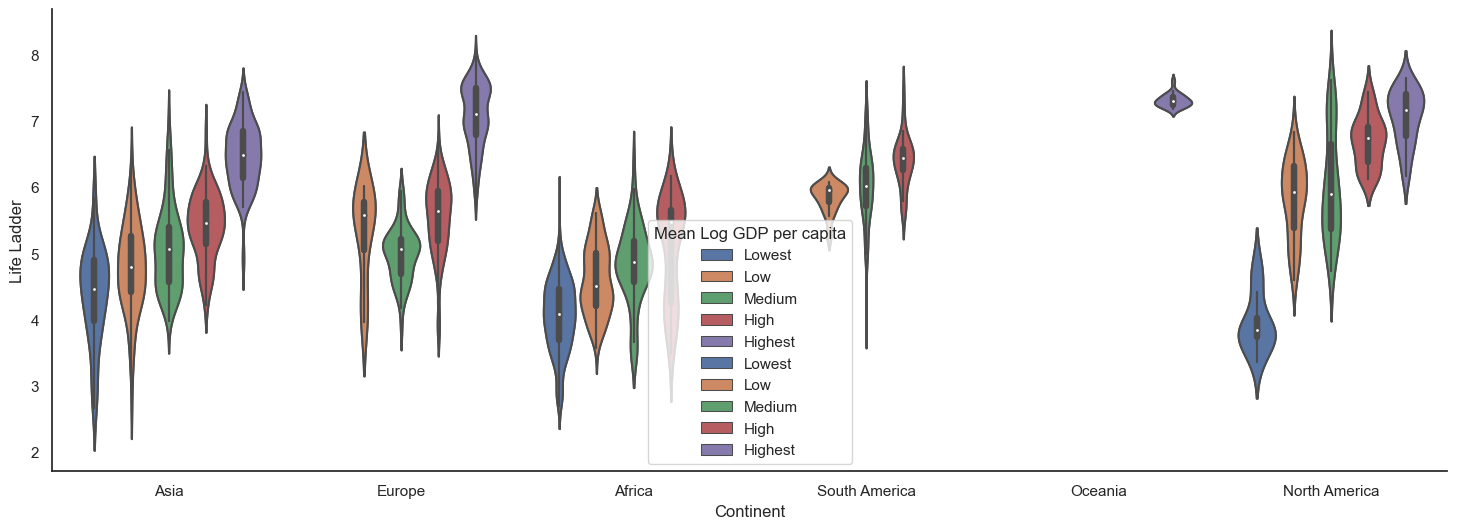

In [77]:
sns.set(
    rc={'figure.figsize':(18,6)}, 
    style="white"
)
sns.violinplot(
    x='Continent',
    y='Life Ladder',
    hue='Mean Log GDP per capita',
    data=data
)
sns.despine()
plt.show()

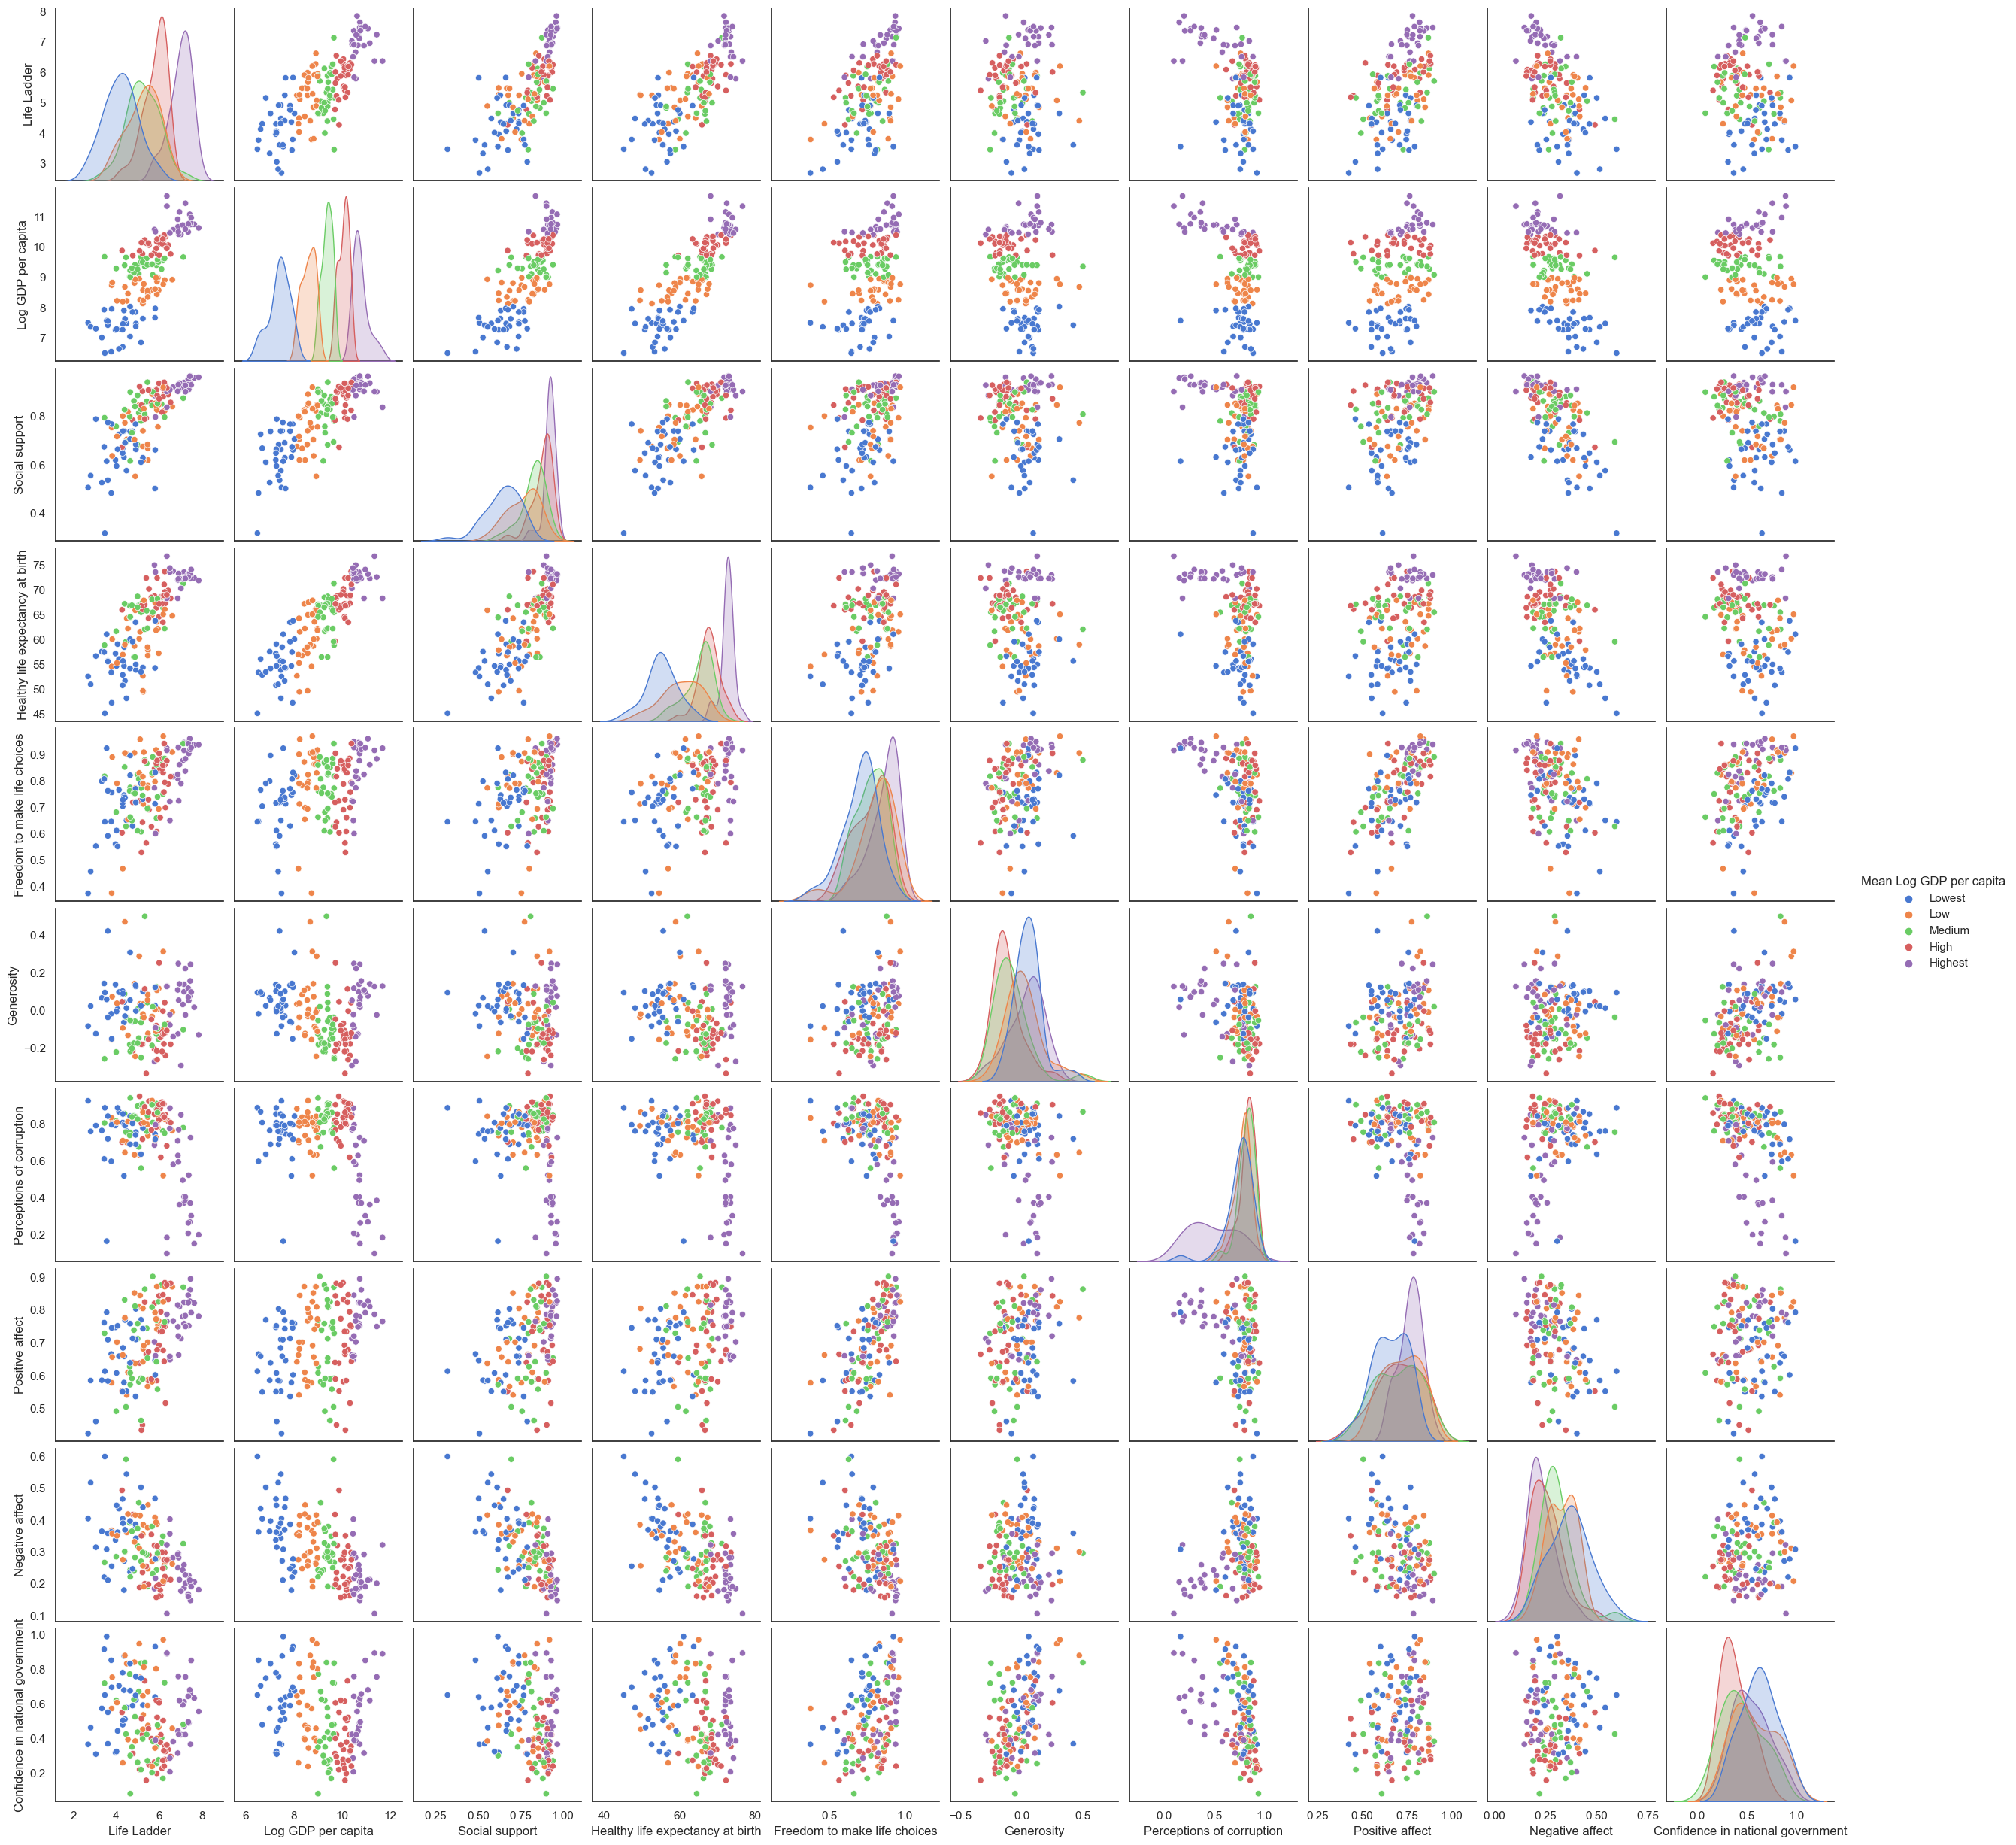

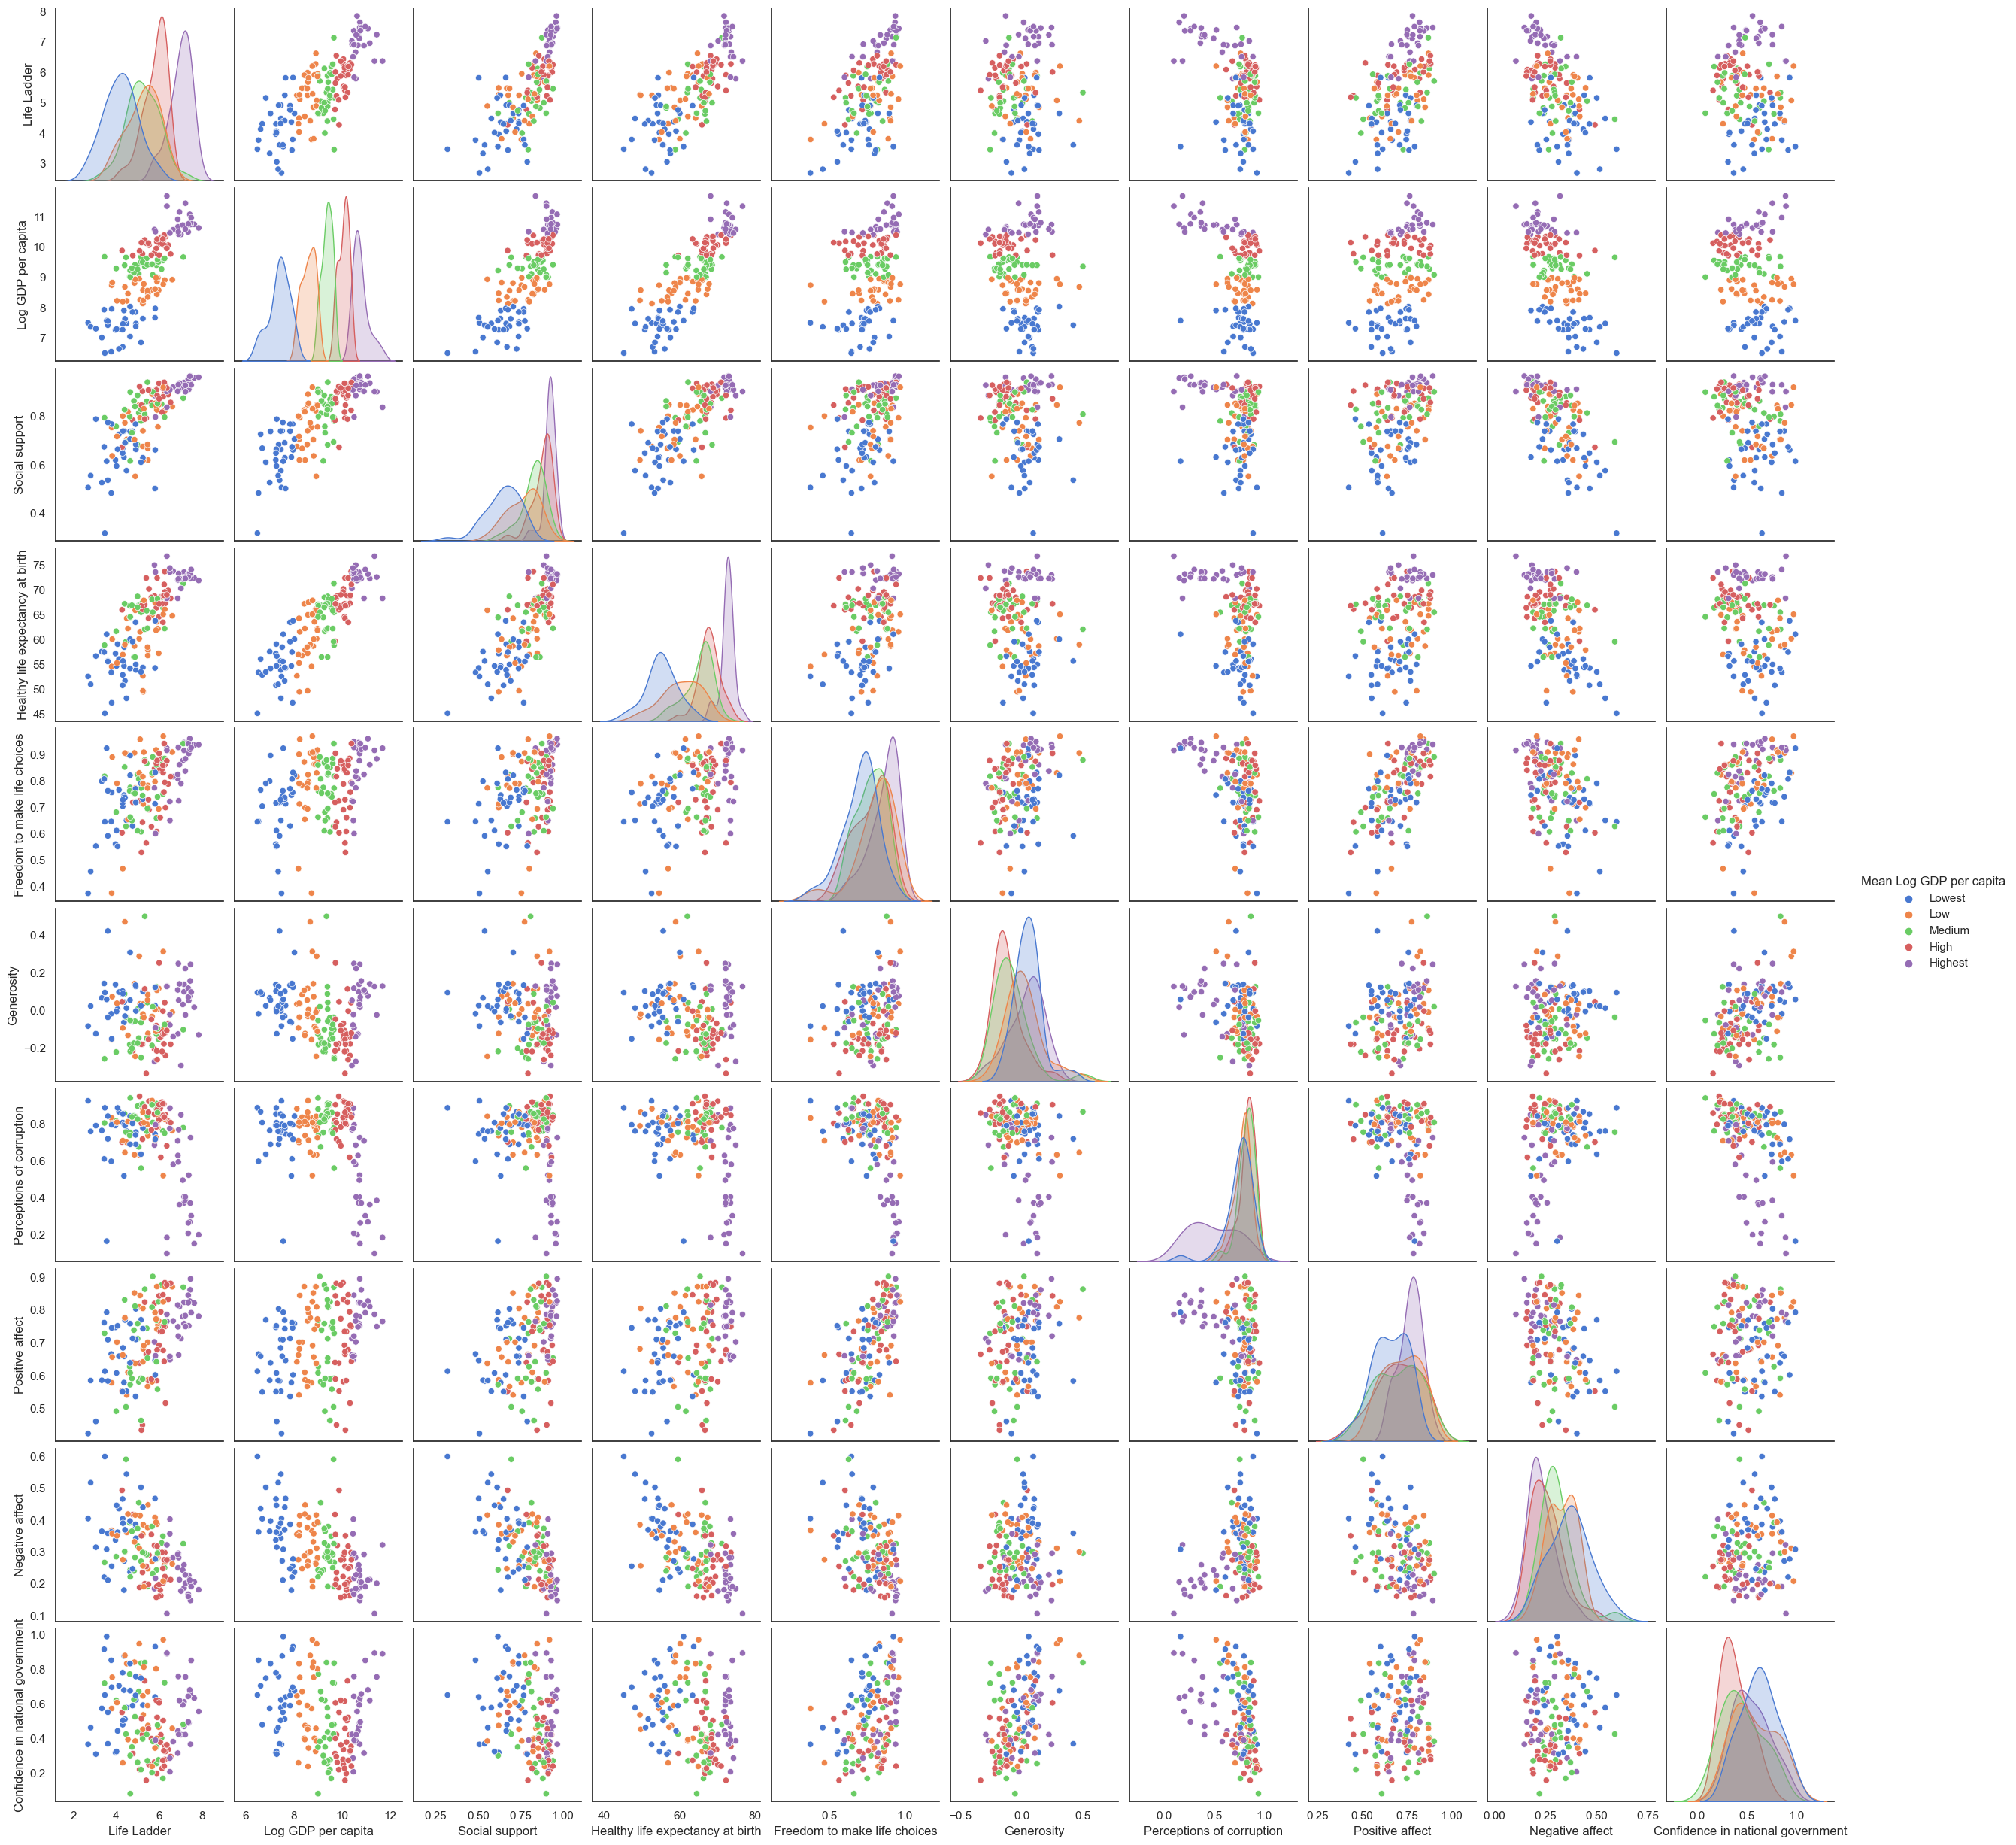

In [79]:
sns.set(
    style="white", 
    palette="muted", 
    color_codes=True
)
sns.pairplot(
    data[data.Year == 2018][[
        'Life Ladder','Log GDP per capita', 
        'Social support','Healthy life expectancy at birth', 
        'Freedom to make life choices','Generosity', 
        'Perceptions of corruption', 'Positive affect',
        'Negative affect','Confidence in national government',
        'Mean Log GDP per capita'
    ]].dropna(), 
    hue='Mean Log GDP per capita'
)
plt.show()

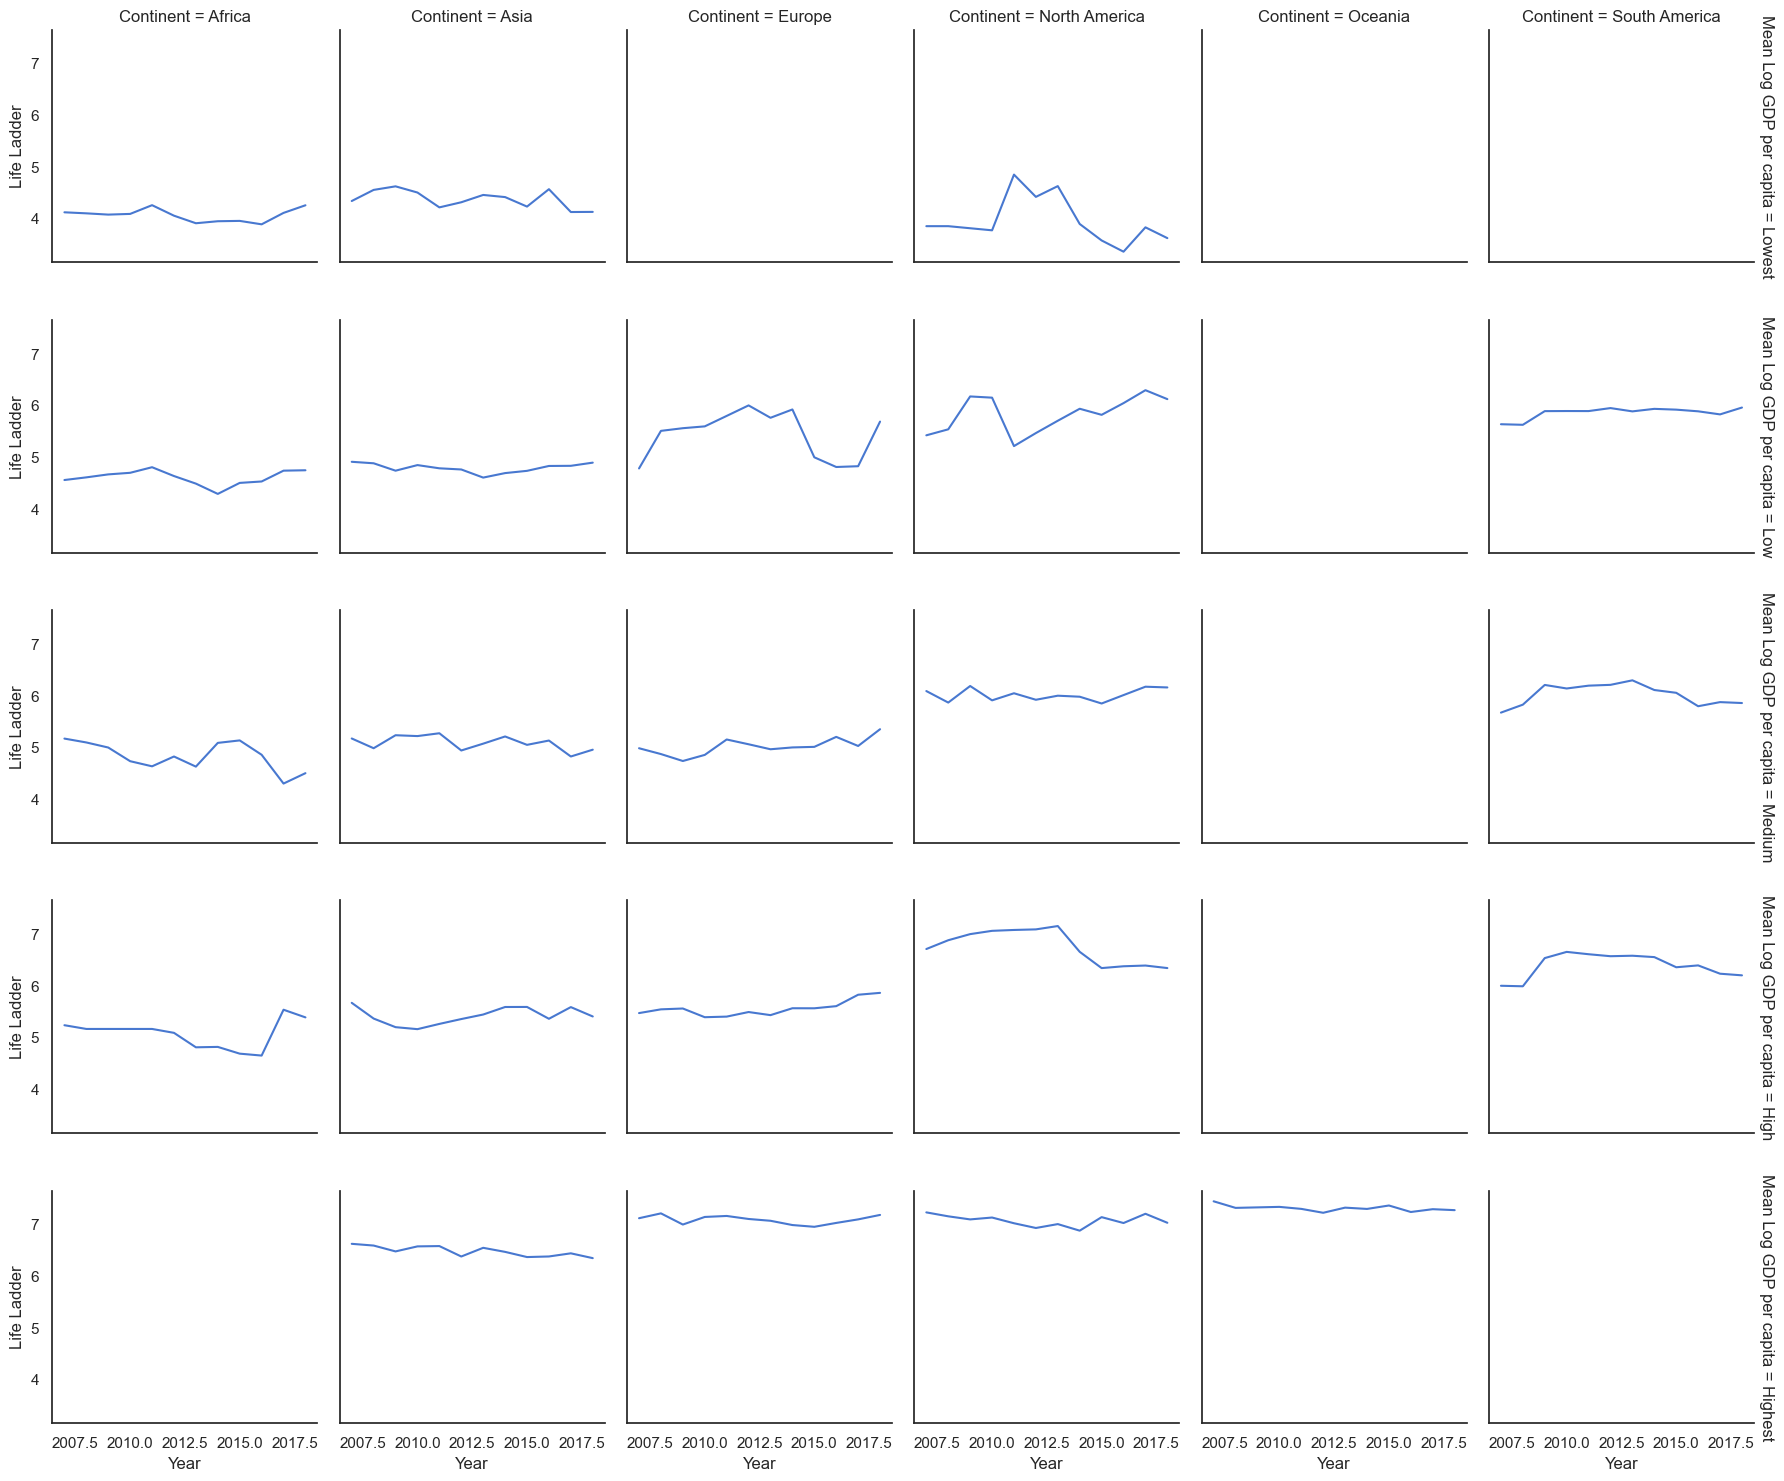

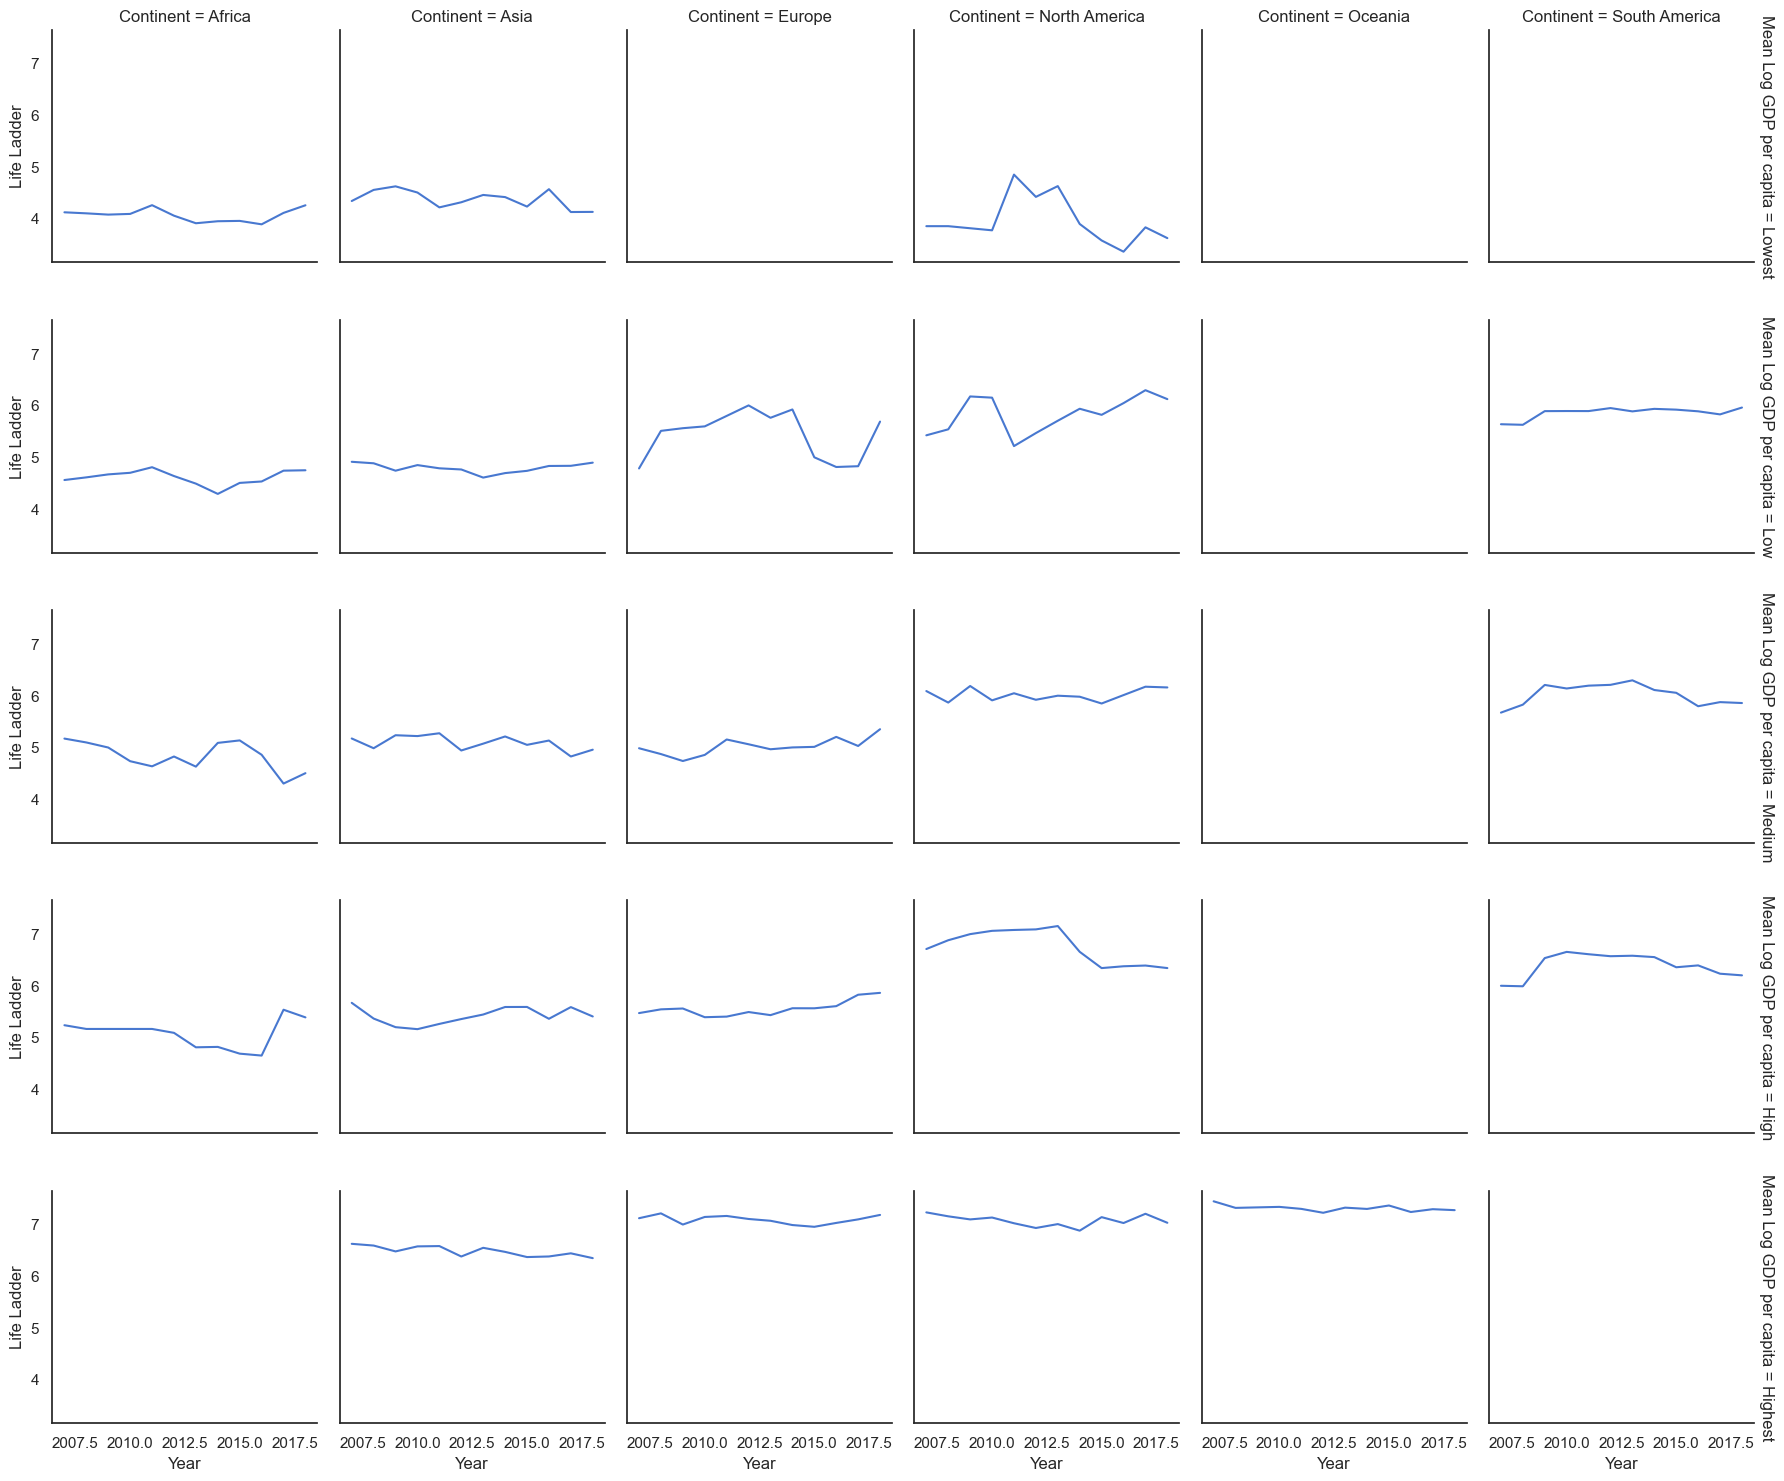

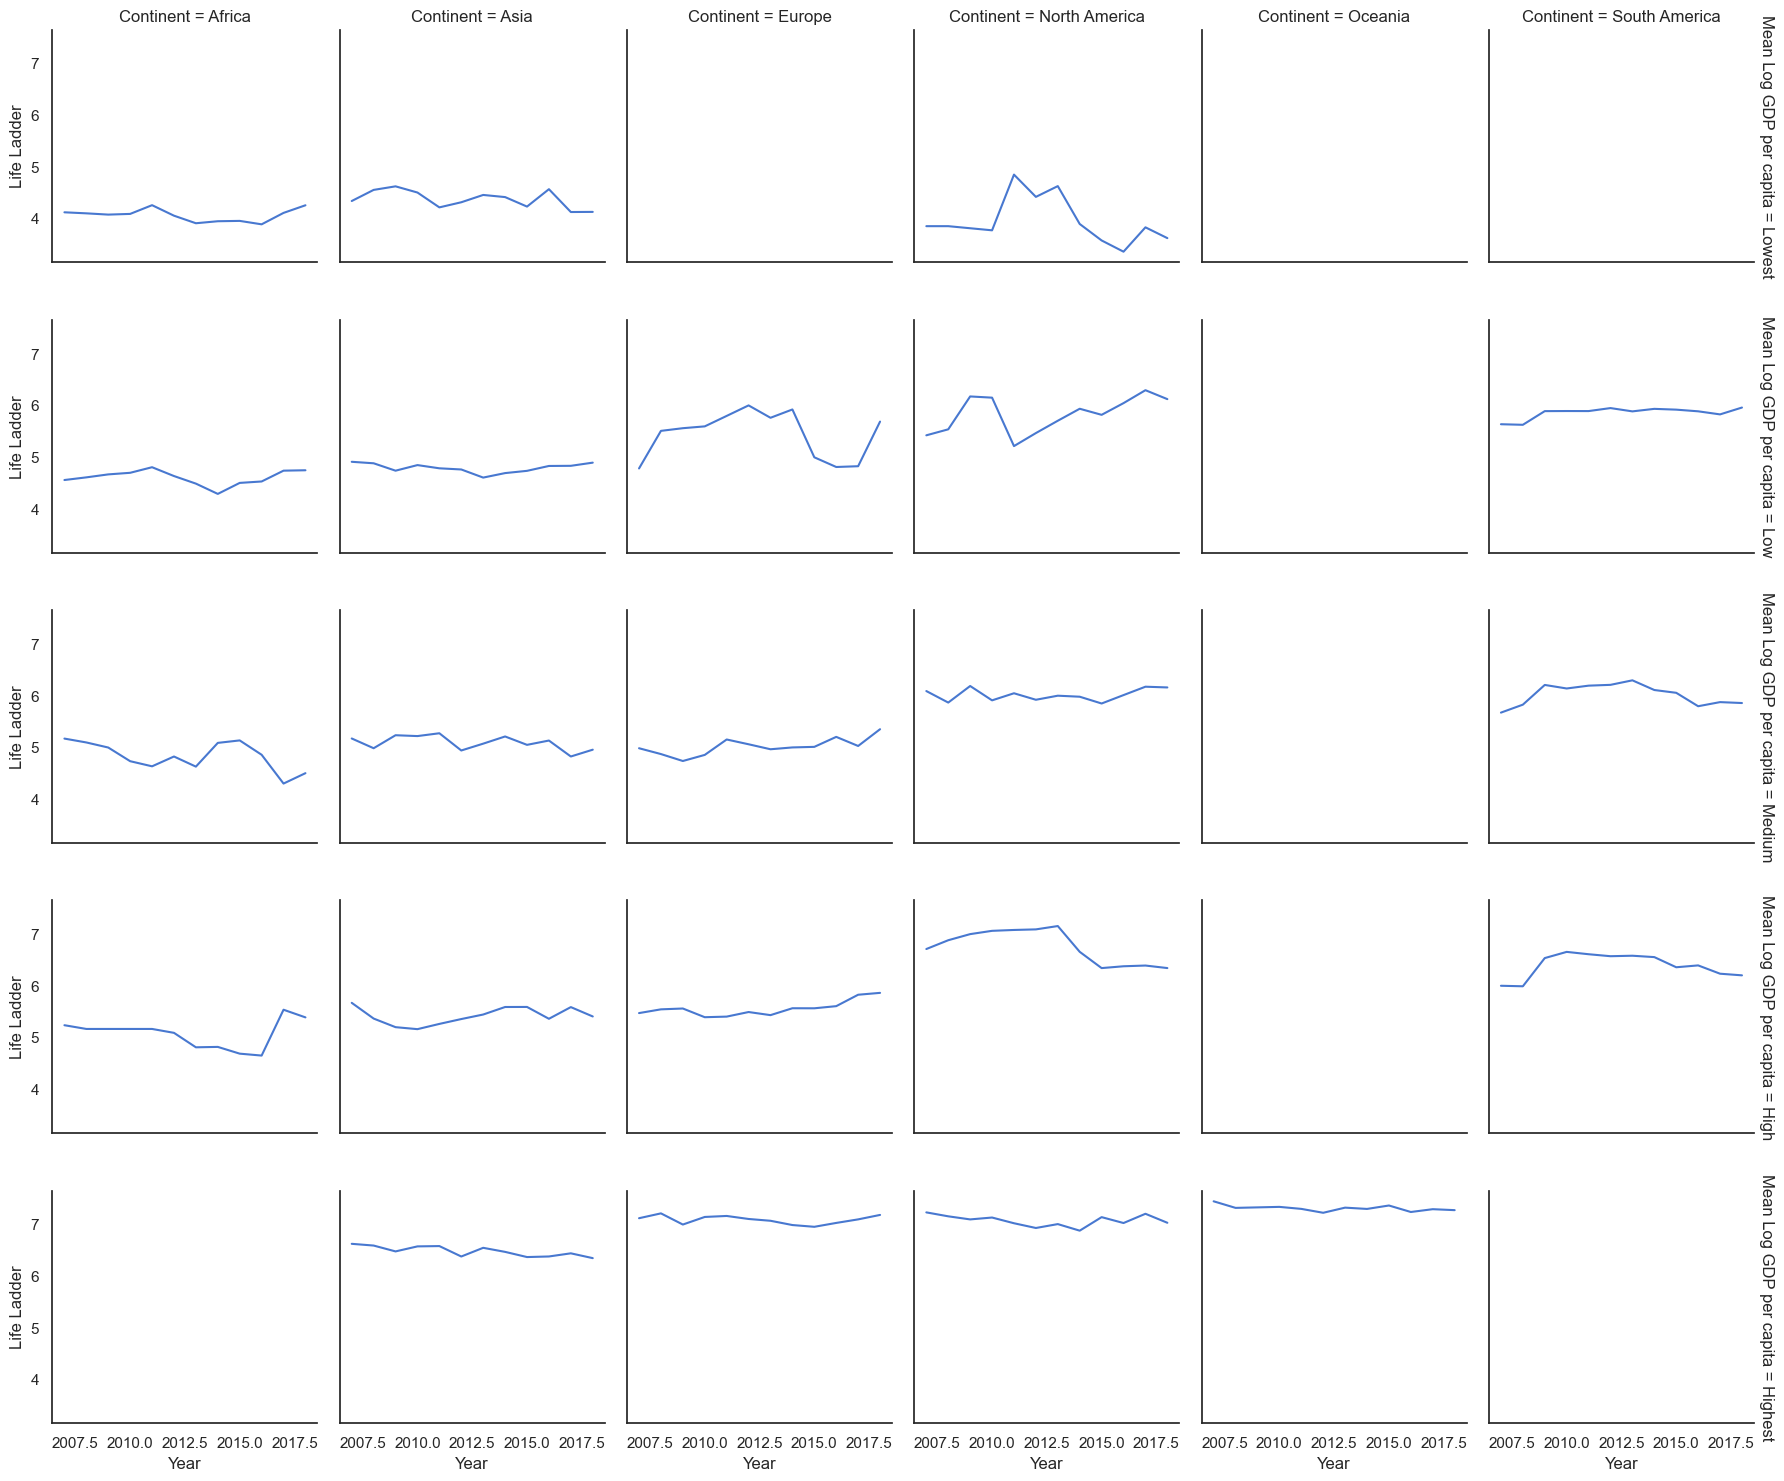

In [82]:
g = sns.FacetGrid(
    data.groupby(['Mean Log GDP per capita','Year','Continent'])['Life Ladder'].mean().reset_index(),
    row='Mean Log GDP per capita',
    col='Continent',
    margin_titles=True
)
g = (g.map(plt.plot, 'Year','Life Ladder'))
plt.show()

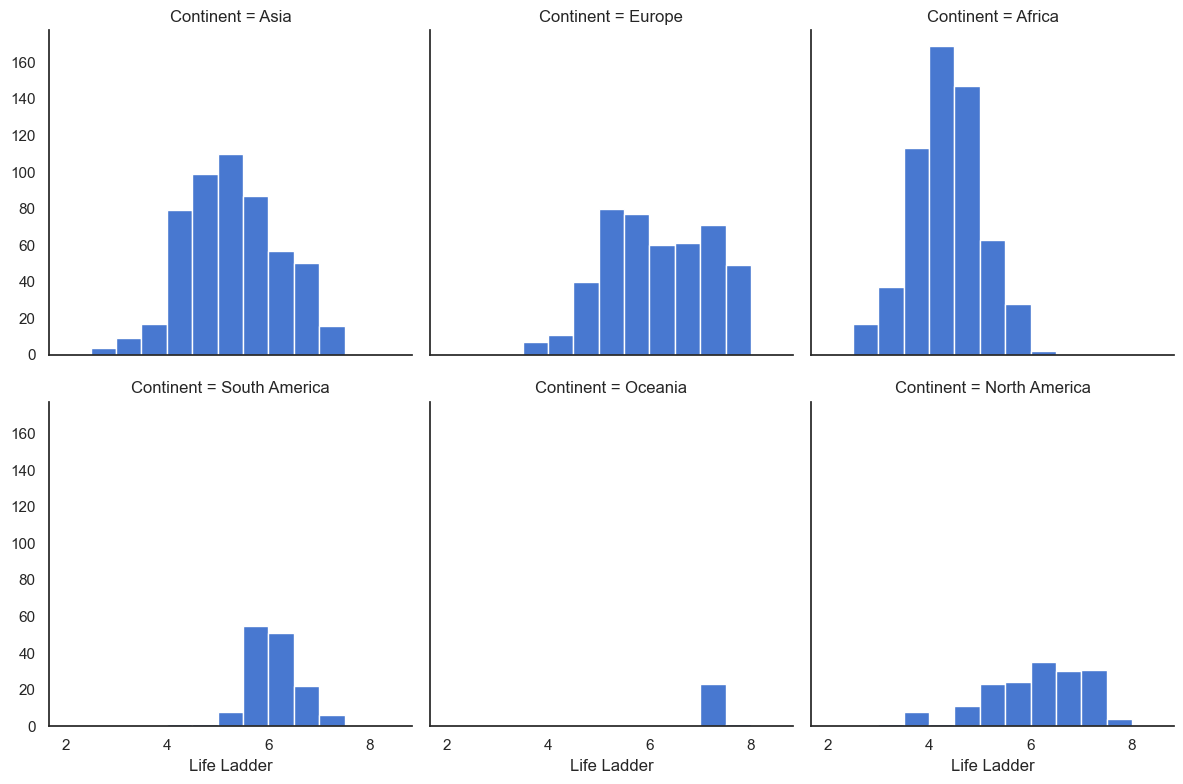

In [83]:
g = sns.FacetGrid(data, col="Continent", col_wrap=3,height=4)
g = (g.map(plt.hist, "Life Ladder",bins=np.arange(2,9,0.5)))
plt.show()

C:\Users\Mark\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Mark\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Mark\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Mark\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func

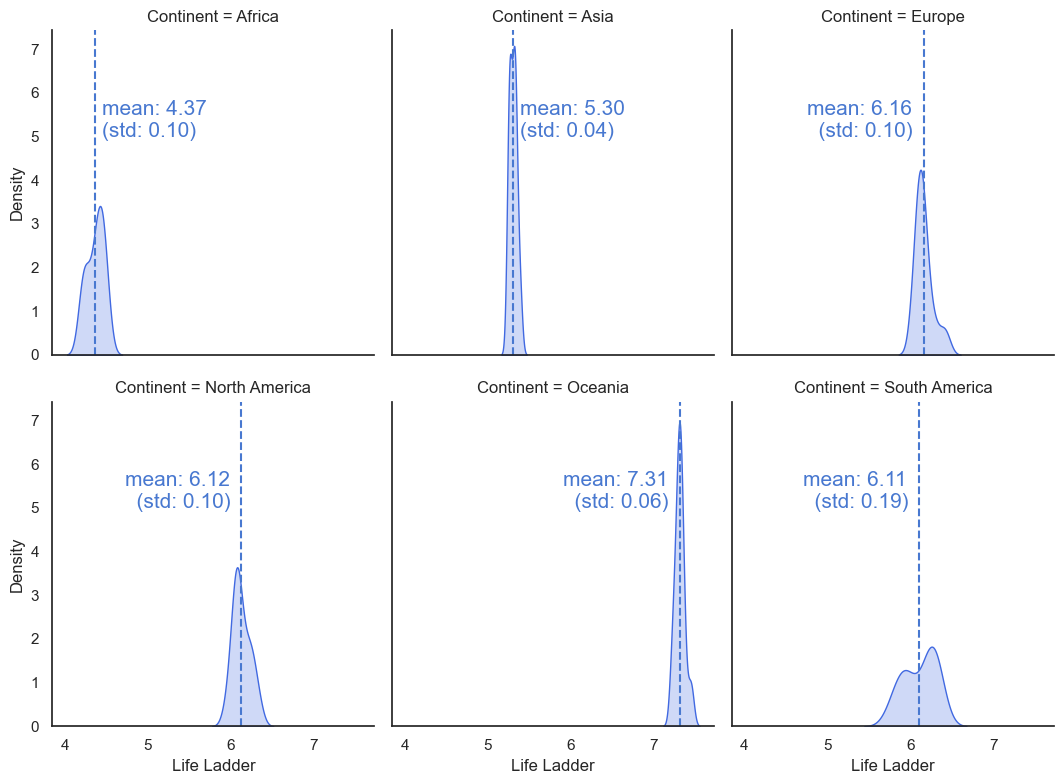

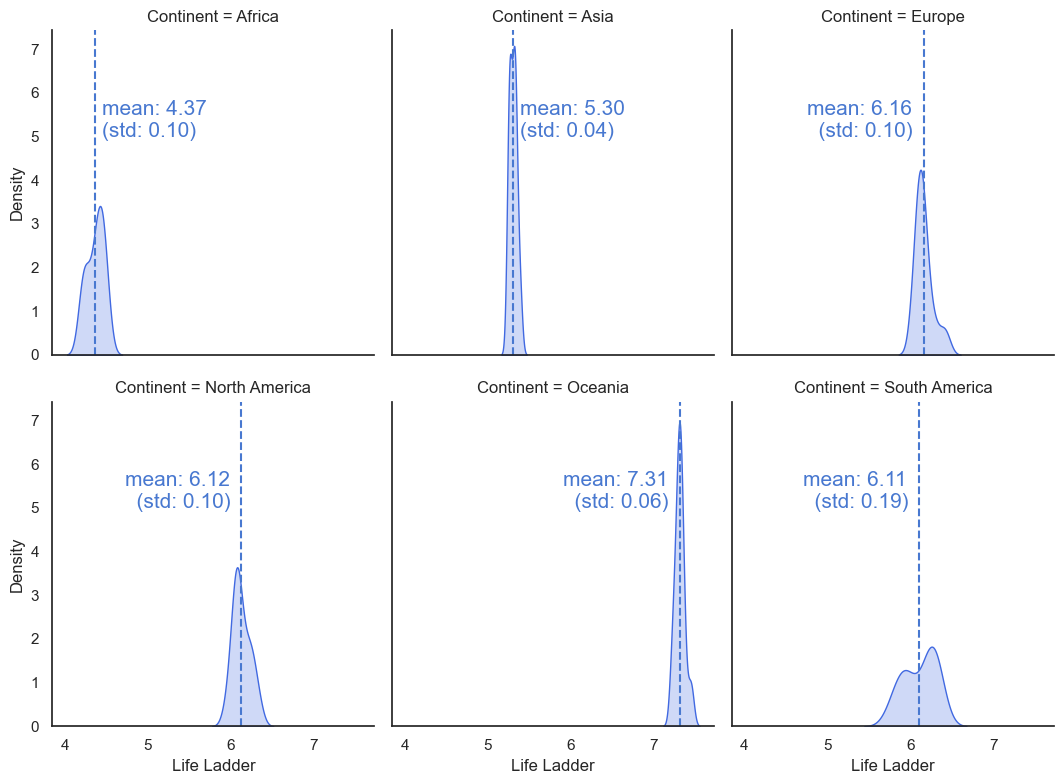

In [85]:
def vertical_mean_line(x, **kwargs):
    plt.axvline(x.mean(), linestyle ="--", 
                color = kwargs.get("color", "r"))
    txkw = dict(size=15, color = kwargs.get("color", "r"))

    label_x_pos_adjustment = 0.08 # this needs customization based on your data
    label_y_pos_adjustment = 5 # this needs customization based on your data
    if x.mean() < 6: # this needs customization based on your data
        tx = "mean: {:.2f}\n(std: {:.2f})".format(x.mean(),x.std())
        plt.text(x.mean() + label_x_pos_adjustment, label_y_pos_adjustment, tx, **txkw)
    else:
        tx = "mean: {:.2f}\n  (std: {:.2f})".format(x.mean(),x.std())
        plt.text(x.mean() -1.4, label_y_pos_adjustment, tx, **txkw)

_ = data.groupby(['Continent','Year'])['Life Ladder'].mean().reset_index()

g = sns.FacetGrid(_, col="Continent", height=4, aspect=0.9, col_wrap=3, margin_titles=True)
g.map(sns.kdeplot, "Life Ladder", shade=True, color='royalblue')
g.map(vertical_mean_line, "Life Ladder")
plt.show()

C:\Users\Mark\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


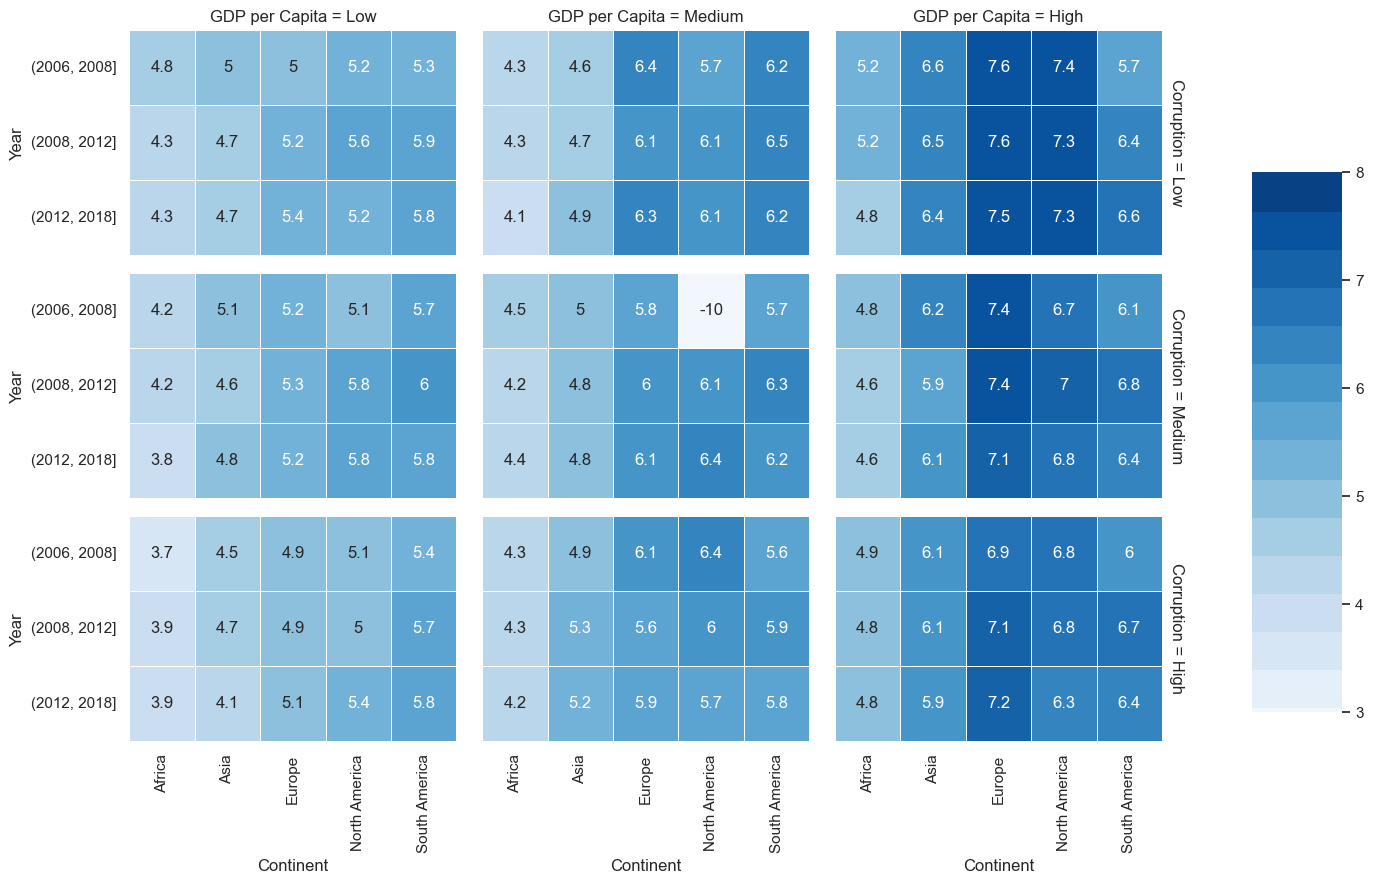

In [86]:
def draw_heatmap(data,inner_row, inner_col, outer_row, outer_col, values, vmin,vmax):
    sns.set(font_scale=1)
    fg = sns.FacetGrid(
        data, 
        row=outer_row,
        col=outer_col, 
        margin_titles=True
    )

    position = left, bottom, width, height = 1.4, .2, .1, .6
    cbar_ax = fg.fig.add_axes(position) 

    fg.map_dataframe(
        draw_heatmap_facet, 
        x_col=inner_col,
        y_col=inner_row, 
        values=values, 
        cbar_ax=cbar_ax,
        vmin=vmin, 
        vmax=vmax
    )

    fg.fig.subplots_adjust(right=1.3)  
    plt.show()

def draw_heatmap_facet(*args, **kwargs):
    data = kwargs.pop('data')
    x_col = kwargs.pop('x_col')
    y_col = kwargs.pop('y_col')
    values = kwargs.pop('values')
    d = data.pivot(index=y_col, columns=x_col, values=values)
    annot = round(d,4).values
    cmap = sns.color_palette("Blues",30) + sns.color_palette("Blues",30)[0::2]
    #cmap = sns.color_palette("Blues",30)
    sns.heatmap(
        d, 
        **kwargs,
        annot=annot, 
        center=0, 
        cmap=cmap, 
        linewidth=.5
    )

# Data preparation
_ = data.copy()
_['Year'] = pd.cut(_['Year'],bins=[2006,2008,2012,2018])

_['GDP per Capita'] = _.groupby(['Continent','Year'])['Log GDP per capita'].transform(
    pd.qcut,
    q=3,
    labels=(['Low','Medium','High'])
).fillna('Low')

_['Corruption'] = _.groupby(['Continent','GDP per Capita'])['Perceptions of corruption'].transform(
    pd.qcut,
    q=3,
    labels=(['Low','Medium','High'])
)

_ = _[_['Continent'] != 'Oceania'].groupby(['Year','Continent','GDP per Capita','Corruption'])['Life Ladder'].mean().reset_index()
_['Life Ladder'] = _['Life Ladder'].fillna(-10)

draw_heatmap(
    data=_,
    outer_row='Corruption',
    outer_col='GDP per Capita',
    inner_row='Year',
    inner_col='Continent',
    values='Life Ladder',
    vmin=3,
    vmax=8,
)